| <a href="https://github.com/marashot96/Lections/blob/main/D&D/Navigator.md"> Обратно к информации по семинару </a> |
| ----| 


# Основные сведения для работы с модулем `scipy.stats`

Здесь приведен инструментарий для "повседневной" работы с данным модулем. Более подробный список функций модуля можно посмотреть [тут](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions)

## Начало работы

Сначала вызовем стандартные для работы библиотеки:

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Наименование классов-распределений в модуле

- `norm` - класс нормального распределения. Необходимо использовать с параметрами `norm(loc=mu, scale=sd)`, где `mu` и `sd` - параметры нормальное распределение. Например, `norm(loc=0, scale=1)` задает стандартное нормальное распределение.

- `uniform` - равномерное распределение. Используется так: `uniform(a, b)`, где `a` и `b`, понятно, начало и конец отрезка, на котором случайная величина имеет ненулевую вероятность.

- `binom` - биноминальное распределение. Параметры `n` и `p` задаются внутри класса: `binom(n, p)`. Например, `binom(10, 0.5)`

- `poisson` - распределение Пуассона. Задается как `poisson(lambda)`, где `lambda` - параметр распределения. Например, `poisson(1)`.

Если мы хотим использовать в программе какое-то из распределений - мы пишем до использования соответсвующего распределения (желательно в начале кода) следующее:

```python
from scipy.stats import norm # В этом случае мы будем использовать нормальное распределение

from scipy.stats import norm, binom # В этом случае мы будем использовать нормальное и биноминальное распределения
```


## Методы, работающие в связке с классами-распределениями

Пусть  `𝑋` — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как `X(params)`. У него доступны следующие методы:

- `X(params).rvs(size=N)` — генерация выборки размера  `𝑁` (Random VariateS). Возвращает numpy.array;
- `X(params).cdf(x)` — значение функции распределения в точке  𝑥 (Cumulative Distribution Function);
- `X(params).logcdf(x)` — значение логарифма функции распределения в точке  𝑥;
- `X(params).ppf(q)` —  `𝑞`-квантиль (Percent Point Function);
- `X(params).mean()` — математическое ожидание;
- `X(params).median()` — медиана ($1/2$-квантиль);
- `X(params).var()` — дисперсия (Variance);
- `X(params).std()` — стандартное отклонение = корень из дисперсии (Standard Deviation).

Кроме того для непрерывных распределений определены функции

- `X(params).pdf(x)` — значение плотности в точке  `𝑥` (Probability Density Function);
- `X(params).logpdf(x)` — значение логарифма плотности в точке `𝑥`.

А для дискретных:

- `X(params).pmf(k)` — значение дискретной плотности в точке  `𝑘` (Probability Mass Function);
- `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке `𝑘`.


## Пример использования классов и методов

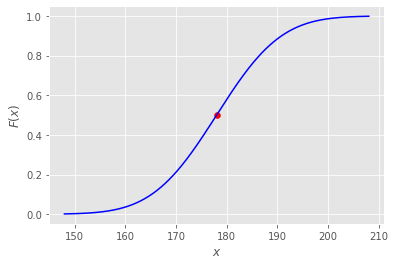

In [30]:
from scipy.stats import norm
[mu, sd] = [178, 10]
rv = norm(loc=mu, scale=sd) # Задали стандартное нормальное распределение

# Генерируем значения на отрезке (mu-3*sd, mu+3*sd) в количестве 1000 шт и строим функцию плотности и распределения
x = np.linspace(mu-3*sd, mu+3*sd, 1000)
cdf = rv.cdf(x) 
pdf = rv.pdf(x)

# Посмотрим на график функции распределения
plt.plot(x, cdf, color='blue')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

# Нанесем проверим на среднем значении
norm_cdf_up_to_mu = rv.cdf(mu)
plt.scatter([mu], [norm_cdf_up_to_mu], color='red')
plt.show()

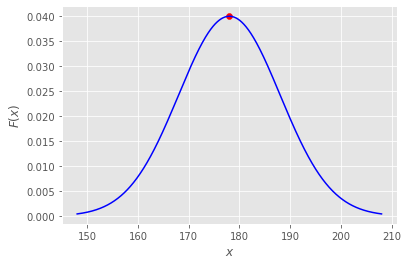

In [31]:
# Посмотрим на график плотности распределения
plt.plot(x, pdf, color='blue')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

# Нанесем проверим на среднем значении
norm_cdf_up_to_mu = rv.pdf(mu)
plt.scatter([mu], [norm_cdf_up_to_mu], color='red')
plt.show()

In [39]:
from scipy.stats import binom

n = 10
p = 0.5
bi = binom(n, p).rvs(100) # Сгенерировали 100 случайных значений биноминального распределения с параметрами n и p

# Выводим математическое ожидание сгенерированной СВ и искомой СВ. Оно должно быть близко к n*p
print(bi.mean(), binom(n, p).mean())

# Выведем 0.9 квантиль данного распределения
print(binom(n, p).ppf(0.9))



5.17 5.0
7.0
